In [40]:
from pylab import*
import pandas as pd
from scipy.io import arff
import plotly.express as px
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [41]:
df1 = pd.DataFrame(arff.loadarff('1year.arff')[0])
df2 = pd.DataFrame(arff.loadarff('2year.arff')[0])
df3 = pd.DataFrame(arff.loadarff('3year.arff')[0])
df4 = pd.DataFrame(arff.loadarff('4year.arff')[0])
df5 = pd.DataFrame(arff.loadarff('5year.arff')[0])

In [42]:
columns=[
"net profit / total assets"
,"total liabilities / total assets"
,"working capital / total assets"
,"current assets / short-term liabilities"
,"[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365"
,"retained earnings / total assets"
,"EBIT / total assets"
,"book value of equity / total liabilities"
,"sales / total assets"
,"equity / total assets"
,"(gross profit + extraordinary items + financial expenses) / total assets"
,"gross profit / short-term liabilities"
,"(gross profit + depreciation) / sales"
,"(gross profit + interest) / total assets"
,"(total liabilities * 365) / (gross profit + depreciation)"
,"(gross profit + depreciation) / total liabilities"
,"total assets / total liabilities"
,"gross profit / total assets"
,"gross profit / sales"
,"(inventory * 365) / sales"
,"sales (n) / sales (n-1)"
,"profit on operating activities / total assets"
,"net profit / sales"
,"gross profit (in 3 years) / total assets"
,"(equity - share capital) / total assets"
,"(net profit + depreciation) / total liabilities"
,"profit on operating activities / financial expenses"
,"working capital / fixed assets"
,"logarithm of total assets"
,"(total liabilities - cash) / sales"
,"(gross profit + interest) / sales"
,"(current liabilities * 365) / cost of products sold"
,"operating expenses / short-term liabilities"
,"operating expenses / total liabilities"
,"profit on sales / total assets"
,"total sales / total assets"
,"(current assets - inventories) / long-term liabilities"
,"constant capital / total assets"
,"profit on sales / sales"
,"(current assets - inventory - receivables) / short-term liabilities"
,"total liabilities / ((profit on operating activities + depreciation) * (12/365))"
,"profit on operating activities / sales"
,"rotation receivables + inventory turnover in days"
,"(receivables * 365) / sales"
,"net profit / inventory"
,"(current assets - inventory) / short-term liabilities"
,"(inventory * 365) / cost of products sold"
,"EBITDA (profit on operating activities - depreciation) / total assets"
,"EBITDA (profit on operating activities - depreciation) / sales"
,"current assets / total liabilities"
,"short-term liabilities / total assets"
,"(short-term liabilities * 365) / cost of products sold)"
,"equity / fixed assets"
,"constant capital / fixed assets"
,"working capital"
,"(sales - cost of products sold) / sales"
,"(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)"
,"total costs /total sales"
,"long-term liabilities / equity"
,"sales / inventory"
,"sales / receivables"
,"(short-term liabilities *365) / sales"
,"sales / short-term liabilities"
,"sales / fixed assets","a predire"]

In [43]:
df1.columns=columns
df2.columns=columns
df3.columns=columns
df4.columns=columns
df5.columns=columns

In [44]:
df1.info

<bound method DataFrame.info of       net profit / total assets  total liabilities / total assets  \
0                      0.200550                           0.37951   
1                      0.209120                           0.49988   
2                      0.248660                           0.69592   
3                      0.081483                           0.30734   
4                      0.187320                           0.61323   
...                         ...                               ...   
7022                   0.018371                           0.47410   
7023                  -0.013359                           0.58354   
7024                   0.006338                           0.50276   
7025                  -0.041643                           0.84810   
7026                   0.014946                           0.94648   

      working capital / total assets  current assets / short-term liabilities  \
0                            0.39641                      

In [45]:
df1.isnull().sum()

net profit / total assets                                                                                               3
total liabilities / total assets                                                                                        3
working capital / total assets                                                                                          3
current assets / short-term liabilities                                                                                30
[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365     8
                                                                                                                       ..
sales / receivables                                                                                                    22
(short-term liabilities *365) / sales                                                                                   0
sales / short-term liabi

In [46]:
df1.isnull().sum().sort_values()

a predire                                                    0
(gross profit + interest) / sales                            0
net profit / sales                                           0
(inventory * 365) / sales                                    0
gross profit / sales                                         0
                                                          ... 
net profit / inventory                                     134
sales / inventory                                          135
profit on operating activities / financial expenses        311
sales (n) / sales (n-1)                                   1622
(current assets - inventories) / long-term liabilities    2740
Length: 65, dtype: int64

In [47]:
df1.describe()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets
count,7024.000000,7024.000000,7024.000000,6997.000000,7.019000e+03,7024.000000,7024.000000,7002.000000,7026.000000,7024.000000,...,7.027000e+03,7.027000e+03,7026.000000,7.027000e+03,7026.000000,6.892000e+03,7005.000000,7.027000e+03,6997.000000,6993.000000
mean,0.034660,0.560215,0.119969,2.629143,-2.631672e+02,0.059712,0.313876,2.623996,5.552855,1.825832,...,8.855693e+03,-1.577367e+02,0.193243,1.587409e+02,0.277829,4.328830e+02,15.642228,4.763202e+03,8.126852,208.731950
std,4.565504,5.350084,5.275459,13.257356,3.707460e+04,6.051113,8.353274,18.708327,101.995448,33.836452,...,7.247527e+04,1.322125e+04,4.344046,1.322124e+04,6.339149,2.612802e+04,261.554534,3.107835e+05,19.996419,5140.708804
min,-256.890000,-72.162000,-440.500000,0.000000,-2.722100e+06,-397.890000,-189.560000,-141.410000,0.000005,-440.550000,...,-8.004700e+05,-1.108300e+06,-315.370000,-4.194000e-03,-327.970000,4.700000e-05,0.000016,0.000000e+00,0.000015,0.000010
25%,0.021182,0.296678,0.026968,1.063100,-4.449800e+01,0.000000,0.028023,0.445710,1.037225,0.300785,...,9.712000e+01,2.031450e-02,0.056772,8.647650e-01,0.000000,5.923950e+00,4.829000,4.322250e+01,3.425400,2.538600
50%,0.075802,0.482960,0.181275,1.502000,-5.373900e+00,0.000000,0.090109,1.015100,1.205750,0.492235,...,1.604800e+03,6.338200e-02,0.175745,9.388100e-01,0.028438,1.004050e+01,7.033700,6.850900e+01,5.303200,4.637700
75%,0.160268,0.680233,0.362548,2.460700,3.777050e+01,0.146660,0.188667,2.267675,2.132975,0.675677,...,5.955900e+03,1.376950e-01,0.351922,9.820150e-01,0.273867,2.013900e+01,10.703000,1.063350e+02,8.357900,9.782200
max,94.280000,441.500000,1.000000,1017.800000,9.909000e+05,303.670000,453.770000,1452.200000,3876.100000,1099.500000,...,4.398400e+06,1.000000e+00,126.670000,1.108300e+06,119.580000,2.137800e+06,21110.000000,2.501600e+07,1042.200000,294770.000000


In [48]:
def switch(x):
  if b'0' == x:
    return 0
  else:
    return 1

In [49]:
df1['a predire']=df1['a predire'].transform(switch)
df2['a predire']=df2['a predire'].transform(switch)
df3['a predire']=df3['a predire'].transform(switch)
df4['a predire']=df4['a predire'].transform(switch)
df5['a predire']=df5['a predire'].transform(switch)
df1['a predire']

0       0
1       0
2       0
3       0
4       0
       ..
7022    1
7023    1
7024    1
7025    1
7026    1
Name: a predire, Length: 7027, dtype: int64

<Axes: >

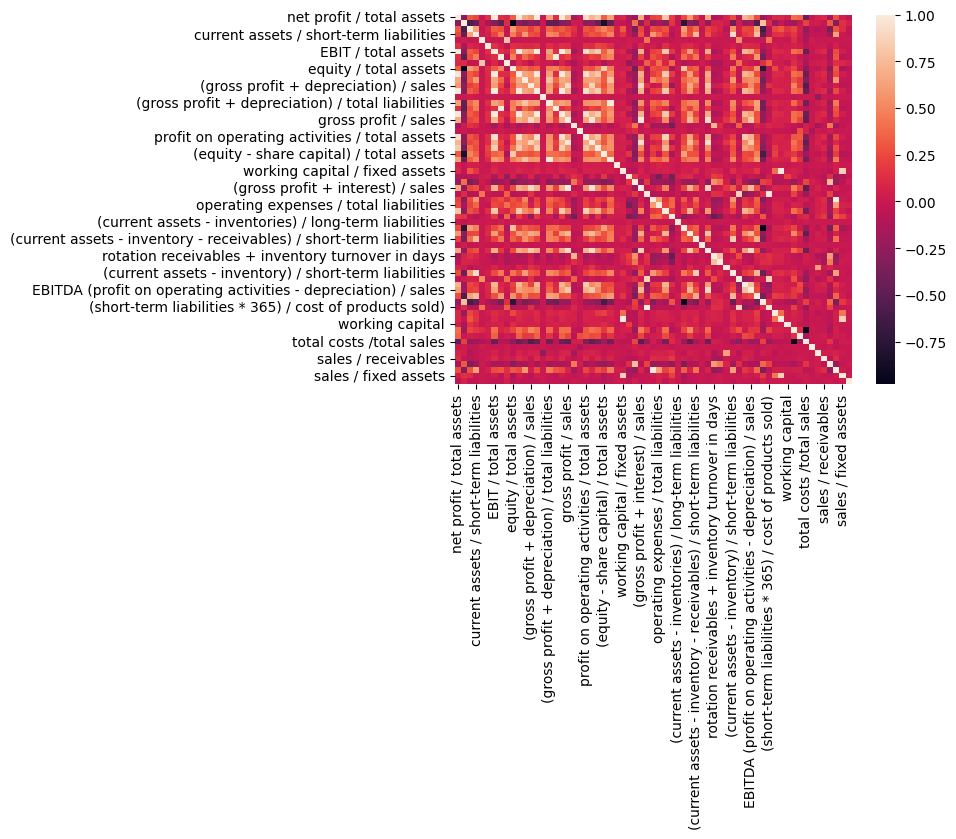

In [50]:
df1corr=df1.copy()
df1corr.dropna(axis=0,inplace=True)
corr = df1corr.corr()
ax = sns.heatmap(corr)
ax

In [51]:
pip install fancyimpute

In [52]:
import fancyimpute

def perform_knn_imputation(df):
    knn_imputed_dataset = fancyimpute.KNN(k=100, verbose=True).fit_transform(df)

    # Convertir le tableau résultant en un dataframe
    knn_imputed_dataframe = pd.DataFrame(data=knn_imputed_dataset, columns=df.columns, index=df.index)

    return knn_imputed_dataframe

knn_imputed_df1 = perform_knn_imputation(df1)

Imputing row 1/7027 with 0 missing, elapsed time: 43.053
Imputing row 101/7027 with 1 missing, elapsed time: 43.062
Imputing row 201/7027 with 2 missing, elapsed time: 43.070
Imputing row 301/7027 with 0 missing, elapsed time: 43.077
Imputing row 401/7027 with 0 missing, elapsed time: 43.083
Imputing row 501/7027 with 1 missing, elapsed time: 43.090
Imputing row 601/7027 with 1 missing, elapsed time: 43.095
Imputing row 701/7027 with 1 missing, elapsed time: 43.102
Imputing row 801/7027 with 0 missing, elapsed time: 43.108
Imputing row 901/7027 with 0 missing, elapsed time: 43.113
Imputing row 1001/7027 with 1 missing, elapsed time: 43.120
Imputing row 1101/7027 with 1 missing, elapsed time: 43.126
Imputing row 1201/7027 with 3 missing, elapsed time: 43.133
Imputing row 1301/7027 with 1 missing, elapsed time: 43.139
Imputing row 1401/7027 with 1 missing, elapsed time: 43.145
Imputing row 1501/7027 with 1 missing, elapsed time: 43.152
Imputing row 1601/7027 with 1 missing, elapsed time:

In [53]:
from imblearn.over_sampling import SMOTE
import pandas as pd

def oversample_with_SMOTE(df, target_column):

    X = df.drop(target_column, axis=1)
    y = df[target_column]

    original_counts = y.value_counts()
    print(f"Original dataset shape {original_counts.to_dict()}")    # Afficher la distribution

    smote = SMOTE()    # Initialiser SMOTE

    X_resampled, y_resampled = smote.fit_resample(X, y)    # Appliquer SMOTE

    resampled_counts = pd.Series(y_resampled).value_counts()
    print(f"Resampled dataset shape {resampled_counts.to_dict()}")# Afficher la nouvelle distribution après SMOTE

    resampled_df = pd.DataFrame(X_resampled, columns=X.columns)    # Créer un nouveau dataframe avec les données suréchantillonnées
    resampled_df[target_column] = y_resampled

    return resampled_df


array([[<Axes: title={'center': 'net profit / total assets'}>,
        <Axes: title={'center': 'total liabilities / total assets'}>,
        <Axes: title={'center': 'working capital / total assets'}>,
        <Axes: title={'center': 'current assets / short-term liabilities'}>,
        <Axes: title={'center': '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365'}>,
        <Axes: title={'center': 'retained earnings / total assets'}>,
        <Axes: title={'center': 'EBIT / total assets'}>,
        <Axes: title={'center': 'book value of equity / total liabilities'}>],
       [<Axes: title={'center': 'sales / total assets'}>,
        <Axes: title={'center': 'equity / total assets'}>,
        <Axes: title={'center': '(gross profit + extraordinary items + financial expenses) / total assets'}>,
        <Axes: title={'center': 'gross profit / short-term liabilities'}>,
        <Axes: title={'center': '(gross profit + depreciation

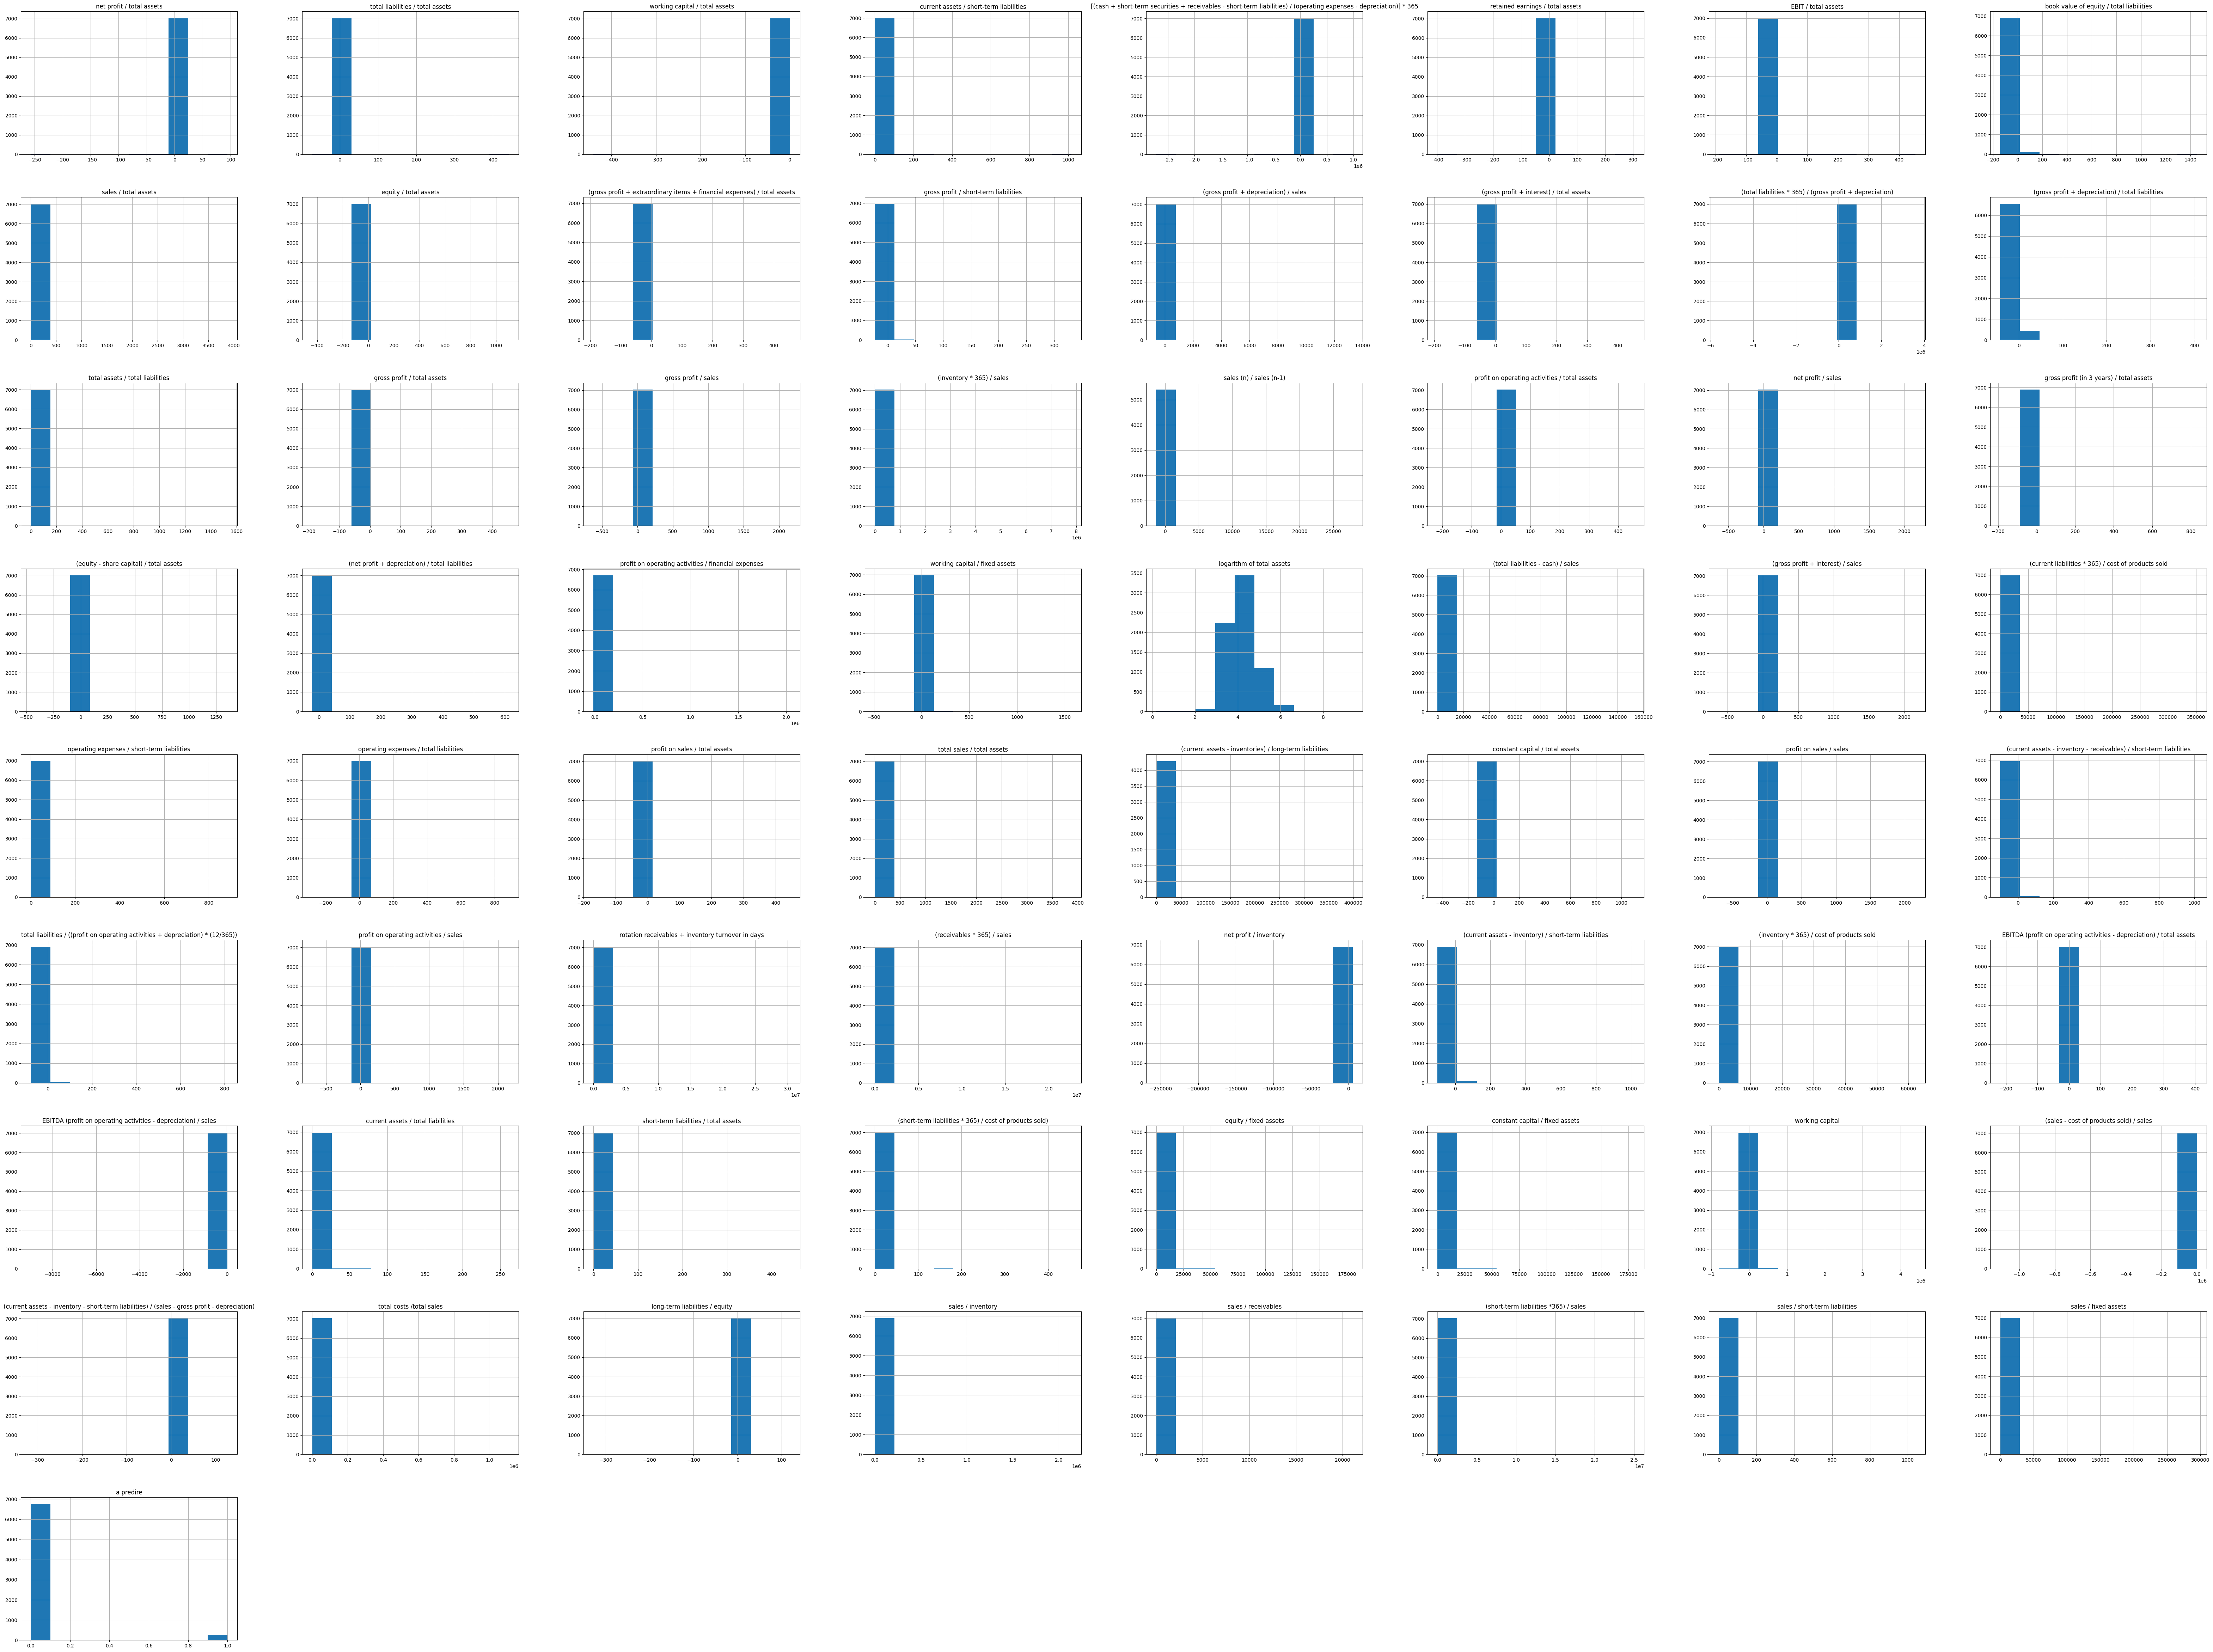

In [54]:
df1.hist(figsize=(80,60))

<Axes: >

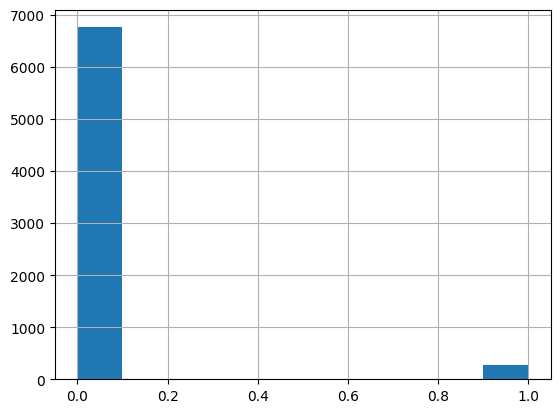

In [55]:
df1['a predire'].hist()

<Axes: >

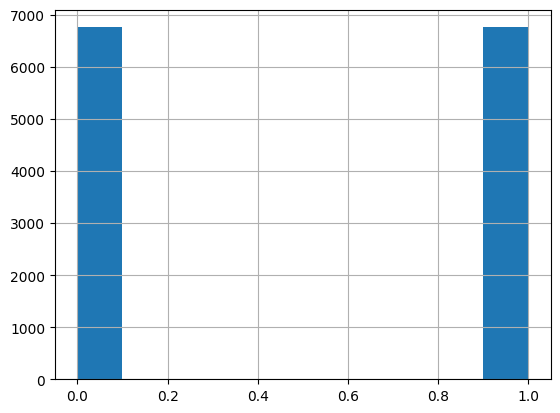

In [56]:
oversampled_df1['a predire'].hist()

In [57]:
def pexpdata(l,p):
  for i in range(len(l)):
    if l[i]>p:
      return i

In [58]:
oversampled_df1=oversample_with_SMOTE(perform_knn_imputation(df1),'a predire')
oversampled_df2=oversample_with_SMOTE(perform_knn_imputation(df2),'a predire')
oversampled_df3=oversample_with_SMOTE(perform_knn_imputation(df3),'a predire')
oversampled_df4=oversample_with_SMOTE(perform_knn_imputation(df4),'a predire')
oversampled_df5=oversample_with_SMOTE(perform_knn_imputation(df5),'a predire')

Imputing row 1/7027 with 0 missing, elapsed time: 20.963
Imputing row 101/7027 with 1 missing, elapsed time: 20.971
Imputing row 201/7027 with 2 missing, elapsed time: 20.980
Imputing row 301/7027 with 0 missing, elapsed time: 20.987
Imputing row 401/7027 with 0 missing, elapsed time: 20.993
Imputing row 501/7027 with 1 missing, elapsed time: 21.000
Imputing row 601/7027 with 1 missing, elapsed time: 21.007
Imputing row 701/7027 with 1 missing, elapsed time: 21.013
Imputing row 801/7027 with 0 missing, elapsed time: 21.019
Imputing row 901/7027 with 0 missing, elapsed time: 21.025
Imputing row 1001/7027 with 1 missing, elapsed time: 21.032
Imputing row 1101/7027 with 1 missing, elapsed time: 21.040
Imputing row 1201/7027 with 3 missing, elapsed time: 21.046
Imputing row 1301/7027 with 1 missing, elapsed time: 21.053
Imputing row 1401/7027 with 1 missing, elapsed time: 21.058
Imputing row 1501/7027 with 1 missing, elapsed time: 21.066
Imputing row 1601/7027 with 1 missing, elapsed time:

In [59]:
pcadf1=oversampled_df1.copy()
pcadf1.drop(columns='a predire',inplace=True)
pcadf1.dropna(axis=0,inplace=True)
df1_normalized=(pcadf1 - pcadf1.mean()) / pcadf1.std()
pca = PCA(n_components=pcadf1.shape[1])
pca.fit(df1_normalized)
comp=pca.explained_variance_ratio_
cum_ex_var_r=[comp[:i].sum() for i in range(len(comp))]
reduc=pca.components_[:pexpdata(cum_ex_var_r,0.99)]
reddf1=oversampled_df1.copy()
reddf1.dropna(axis=0,inplace=True)
apredire=reddf1['a predire']
reddf1.drop(columns='a predire',inplace=True)
reddf1=reddf1.dot(reduc.T)
reddf1['a predire']=apredire
from sklearn.model_selection import train_test_split
X = reddf1.loc[:, reddf1.columns != "a predire"]
y = apredire
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=20)
from sklearn.neighbors import NearestCentroid
clf=NearestCentroid()
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
l1=[]
acc=1-array([abs(list(y_test)[i]-pred[i]) for i in range(len(pred))]).sum()/len(pred)
l1+=[(acc,"NearestCentroid")]
cm1=confusion_matrix(y_test,pred)
param_grid_nearest_centroid = {'metric': ['euclidean', 'manhattan', 'cosine']}
grid_search_nearest_centroid = GridSearchCV(clf, param_grid_nearest_centroid, cv=5)
grid_search_nearest_centroid.fit(X_train, y_train)
print("Meilleurs paramètres pour NearestCentroid:", grid_search_nearest_centroid.best_params_)
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
acc=1-array([abs(list(y_test)[i]-pred[i]) for i in range(len(pred))]).sum()/len(pred)
l1+=[(acc,"DecisionTreeClassifier")]
cm2=confusion_matrix(y_test,pred)
param_grid_decision_tree = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30]}
grid_search_decision_tree = GridSearchCV(clf, param_grid_decision_tree, cv=5)
grid_search_decision_tree.fit(X_train, y_train)
print("Meilleurs paramètres pour DecisionTreeClassifier:", grid_search_decision_tree.best_params_)
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
acc=1-array([abs(list(y_test)[i]-pred[i]) for i in range(len(pred))]).sum()/len(pred)
l1+=[(acc,"SGDClassifier")]
cm3=confusion_matrix(y_test,pred)
param_grid_sgd_classifier = {'loss': ['hinge', 'log', 'modified_huber'],
                              'alpha': [0.0001, 0.001, 0.01, 0.1]}
grid_search_sgd_classifier = GridSearchCV(clf, param_grid_sgd_classifier, cv=5)
grid_search_sgd_classifier.fit(X_train, y_train)
print("Meilleurs paramètres pour SGDClassifier:", grid_search_sgd_classifier.best_params_)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
acc=1-array([abs(list(y_test)[i]-pred[i]) for i in range(len(pred))]).sum()/len(pred)
l1+=[(acc,"RandomForestClassifier")]
cm4=confusion_matrix(y_test,pred)
print(sorted(l1,reverse=True))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_nearest_centroid.py:179: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_nearest_centroid.py:179: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_nearest_centroid.py:179: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_nearest_centroid.py:179: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_nearest_centroid.py:179: UserWarning: Averaging for metri

Meilleurs paramètres pour NearestCentroid: {'metric': 'manhattan'}
Meilleurs paramètres pour DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': 30}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Meilleurs paramètres pour SGDClassifier: {'alpha': 0.0001, 'loss': 'log'}
[(0.9422735346358793, 'RandomForestClassifier'), (0.8809946714031972, 'DecisionTreeClassifier'), (0.5663114268798106, 'NearestCentroid'), (0.4780935464772055, 'SGDClassifier')]


<Axes: title={'center': 'RandomForestClassifier'}>

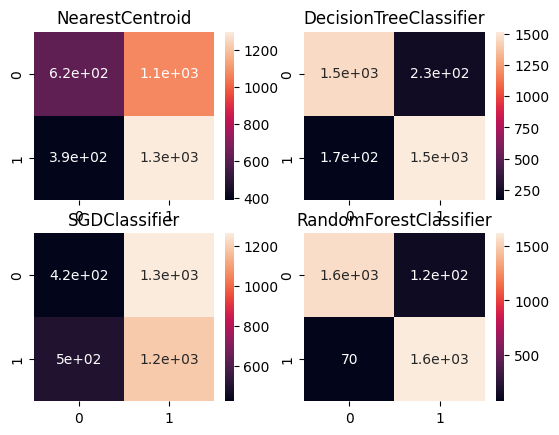

In [60]:
subplot(2,2,1)
title('NearestCentroid')
sns.heatmap(cm1,annot=True)
subplot(2,2,2)
title('DecisionTreeClassifier')
sns.heatmap(cm2,annot=True)
subplot(2,2,3)
title('SGDClassifier')
sns.heatmap(cm3,annot=True)
subplot(2,2,4)
title('RandomForestClassifier')
sns.heatmap(cm4,annot=True)

In [61]:
pcadf1=oversampled_df2.copy()
pcadf1.drop(columns='a predire',inplace=True)
pcadf1.dropna(axis=0,inplace=True)
df1_normalized=(pcadf1 - pcadf1.mean()) / pcadf1.std()
#df1_normalized.dropna(axis=1,inplace=True)
pca = PCA(n_components=pcadf1.shape[1])
pca.fit(df1_normalized)
# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df1_normalized.columns))],
index=pcadf1.columns)
comp=pca.explained_variance_ratio_
cum_ex_var_r=[comp[:i].sum() for i in range(len(comp))]
reduc=pca.components_[:pexpdata(cum_ex_var_r,0.99)]
reddf1=oversampled_df2.copy()
reddf1.dropna(axis=0,inplace=True)
apredire=reddf1['a predire']
reddf1.drop(columns='a predire',inplace=True)
reddf1=reddf1.dot(reduc.T)
reddf1['a predire']=apredire
X = reddf1.loc[:, reddf1.columns != "a predire"]
y = apredire
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=20)
clf=NearestCentroid()
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
l2=[]
acc=1-array([abs(list(y_test)[i]-pred[i]) for i in range(len(pred))]).sum()/len(pred)
l2+=[(acc,"NearestCentroid")]
cm1=confusion_matrix(y_test,pred)
param_grid_nearest_centroid = {'metric': ['euclidean', 'manhattan', 'cosine']}
grid_search_nearest_centroid = GridSearchCV(clf, param_grid_nearest_centroid, cv=5)
grid_search_nearest_centroid.fit(X_train, y_train)
print("Meilleurs paramètres pour NearestCentroid:", grid_search_nearest_centroid.best_params_)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
acc=1-array([abs(list(y_test)[i]-pred[i]) for i in range(len(pred))]).sum()/len(pred)
l2+=[(acc,"DecisionTreeClassifier")]
cm2=confusion_matrix(y_test,pred)
param_grid_decision_tree = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30]}
grid_search_decision_tree = GridSearchCV(clf, param_grid_decision_tree, cv=5)
grid_search_decision_tree.fit(X_train, y_train)
print("Meilleurs paramètres pour DecisionTreeClassifier:", grid_search_decision_tree.best_params_)
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
acc=1-array([abs(list(y_test)[i]-pred[i]) for i in range(len(pred))]).sum()/len(pred)
l2+=[(acc,"SGDClassifier")]
cm3=confusion_matrix(y_test,pred)
param_grid_sgd_classifier = {'loss': ['hinge', 'log', 'modified_huber'],
                              'alpha': [0.0001, 0.001, 0.01, 0.1]}
grid_search_sgd_classifier = GridSearchCV(clf, param_grid_sgd_classifier, cv=5)
grid_search_sgd_classifier.fit(X_train, y_train)
print("Meilleurs paramètres pour SGDClassifier:", grid_search_sgd_classifier.best_params_)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
acc=1-array([abs(list(y_test)[i]-pred[i]) for i in range(len(pred))]).sum()/len(pred)
l2+=[(acc,"RandomForestClassifier")]
cm4=confusion_matrix(y_test,pred)
print(sorted(l2,reverse=True))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_nearest_centroid.py:179: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_nearest_centroid.py:179: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_nearest_centroid.py:179: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_nearest_centroid.py:179: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_nearest_centroid.py:179: UserWarning: Averaging for metri

Meilleurs paramètres pour NearestCentroid: {'metric': 'manhattan'}
Meilleurs paramètres pour DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': None}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Meilleurs paramètres pour SGDClassifier: {'alpha': 0.001, 'loss': 'hinge'}
[(0.9476161244117045, 'RandomForestClassifier'), (0.8745651729077144, 'DecisionTreeClassifier'), (0.5553509310415388, 'NearestCentroid'), (0.5138121546961326, 'SGDClassifier')]


<Axes: title={'center': 'RandomForestClassifier'}>

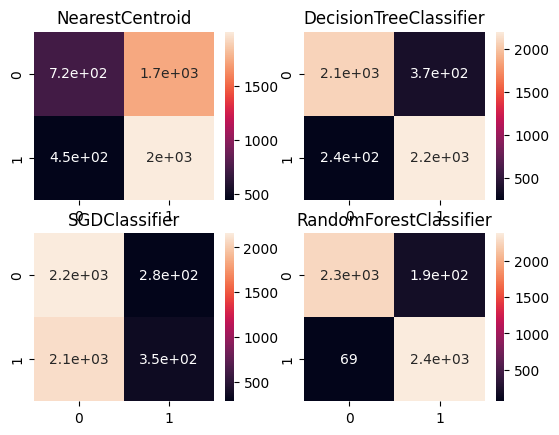

In [62]:
subplot(2,2,1)
title('NearestCentroid')
sns.heatmap(cm1,annot=True)
subplot(2,2,2)
title('DecisionTreeClassifier')
sns.heatmap(cm2,annot=True)
subplot(2,2,3)
title('SGDClassifier')
sns.heatmap(cm3,annot=True)
subplot(2,2,4)
title('RandomForestClassifier')
sns.heatmap(cm4,annot=True)

In [63]:
pcadf1=oversampled_df3.copy()
pcadf1.drop(columns='a predire',inplace=True)
pcadf1.dropna(axis=0,inplace=True)
df1_normalized=(pcadf1 - pcadf1.mean()) / pcadf1.std()
#df1_normalized.dropna(axis=1,inplace=True)
pca = PCA(n_components=pcadf1.shape[1])
pca.fit(df1_normalized)
# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df1_normalized.columns))],
index=pcadf1.columns)
comp=pca.explained_variance_ratio_
cum_ex_var_r=[comp[:i].sum() for i in range(len(comp))]
reduc=pca.components_[:pexpdata(cum_ex_var_r,0.99)]
reddf1=oversampled_df3.copy()
reddf1.dropna(axis=0,inplace=True)
apredire=reddf1['a predire']
reddf1.drop(columns='a predire',inplace=True)
reddf1=reddf1.dot(reduc.T)
reddf1['a predire']=apredire
X = reddf1.loc[:, reddf1.columns != "a predire"]
y = apredire
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=20)
clf=NearestCentroid()
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
l3=[]
acc=1-array([abs(list(y_test)[i]-pred[i]) for i in range(len(pred))]).sum()/len(pred)
l3+=[(acc,"NearestCentroid")]
cm1=confusion_matrix(y_test,pred)
param_grid_nearest_centroid = {'metric': ['euclidean', 'manhattan', 'cosine']}
grid_search_nearest_centroid = GridSearchCV(clf, param_grid_nearest_centroid, cv=5)
grid_search_nearest_centroid.fit(X_train, y_train)
print("Meilleurs paramètres pour NearestCentroid:", grid_search_nearest_centroid.best_params_)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
acc=1-array([abs(list(y_test)[i]-pred[i]) for i in range(len(pred))]).sum()/len(pred)
l3+=[(acc,"DecisionTreeClassifier")]
cm2=confusion_matrix(y_test,pred)
param_grid_decision_tree = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30]}
grid_search_decision_tree = GridSearchCV(clf, param_grid_decision_tree, cv=5)
grid_search_decision_tree.fit(X_train, y_train)
print("Meilleurs paramètres pour DecisionTreeClassifier:", grid_search_decision_tree.best_params_)
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
acc=1-array([abs(list(y_test)[i]-pred[i]) for i in range(len(pred))]).sum()/len(pred)
l3+=[(acc,"SGDClassifier")]
cm3=confusion_matrix(y_test,pred)
param_grid_sgd_classifier = {'loss': ['hinge', 'log', 'modified_huber'],
                              'alpha': [0.0001, 0.001, 0.01, 0.1]}
grid_search_sgd_classifier = GridSearchCV(clf, param_grid_sgd_classifier, cv=5)
grid_search_sgd_classifier.fit(X_train, y_train)
print("Meilleurs paramètres pour SGDClassifier:", grid_search_sgd_classifier.best_params_)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
acc=1-array([abs(list(y_test)[i]-pred[i]) for i in range(len(pred))]).sum()/len(pred)
l3+=[(acc,"RandomForestClassifier")]
cm4=confusion_matrix(y_test,pred)
print(sorted(l3,reverse=True))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_nearest_centroid.py:179: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_nearest_centroid.py:179: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_nearest_centroid.py:179: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_nearest_centroid.py:179: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_nearest_centroid.py:179: UserWarning: Averaging for metri

Meilleurs paramètres pour NearestCentroid: {'metric': 'manhattan'}
Meilleurs paramètres pour DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': 30}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Meilleurs paramètres pour SGDClassifier: {'alpha': 0.1, 'loss': 'modified_huber'}
[(0.9370503597122302, 'RandomForestClassifier'), (0.8677058353317346, 'DecisionTreeClassifier'), (0.5631494804156675, 'NearestCentroid'), (0.5261790567545963, 'SGDClassifier')]


<Axes: title={'center': 'RandomForestClassifier'}>

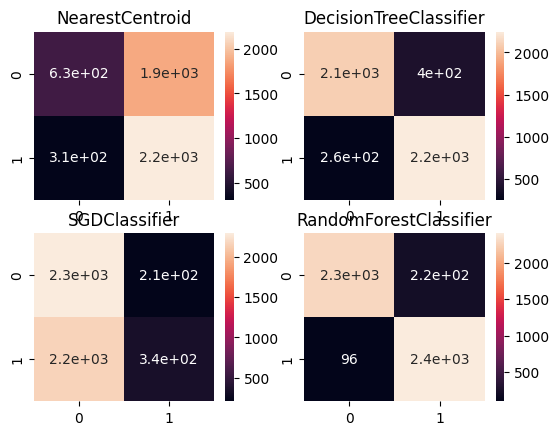

In [64]:
subplot(2,2,1)
title('NearestCentroid')
sns.heatmap(cm1,annot=True)
subplot(2,2,2)
title('DecisionTreeClassifier')
sns.heatmap(cm2,annot=True)
subplot(2,2,3)
title('SGDClassifier')
sns.heatmap(cm3,annot=True)
subplot(2,2,4)
title('RandomForestClassifier')
sns.heatmap(cm4,annot=True)

In [65]:
pcadf1=oversampled_df4.copy()
pcadf1.drop(columns='a predire',inplace=True)
pcadf1.dropna(axis=0,inplace=True)
df1_normalized=(pcadf1 - pcadf1.mean()) / pcadf1.std()
#df1_normalized.dropna(axis=1,inplace=True)
pca = PCA(n_components=pcadf1.shape[1])
pca.fit(df1_normalized)
# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df1_normalized.columns))],
index=pcadf1.columns)
comp=pca.explained_variance_ratio_
cum_ex_var_r=[comp[:i].sum() for i in range(len(comp))]
reduc=pca.components_[:pexpdata(cum_ex_var_r,0.99)]
reddf1=oversampled_df4.copy()
reddf1.dropna(axis=0,inplace=True)
apredire=reddf1['a predire']
reddf1.drop(columns='a predire',inplace=True)
reddf1=reddf1.dot(reduc.T)
reddf1['a predire']=apredire
X = reddf1.loc[:, reddf1.columns != "a predire"]
y = apredire
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=20)
clf=NearestCentroid()
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
l4=[]
acc=1-array([abs(list(y_test)[i]-pred[i]) for i in range(len(pred))]).sum()/len(pred)
l4+=[(acc,"NearestCentroid")]
cm1=confusion_matrix(y_test,pred)
param_grid_nearest_centroid = {'metric': ['euclidean', 'manhattan', 'cosine']}
grid_search_nearest_centroid = GridSearchCV(clf, param_grid_nearest_centroid, cv=5)
grid_search_nearest_centroid.fit(X_train, y_train)
print("Meilleurs paramètres pour NearestCentroid:", grid_search_nearest_centroid.best_params_)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
acc=1-array([abs(list(y_test)[i]-pred[i]) for i in range(len(pred))]).sum()/len(pred)
l4+=[(acc,"DecisionTreeClassifier")]
cm2=confusion_matrix(y_test,pred)
param_grid_decision_tree = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30]}
grid_search_decision_tree = GridSearchCV(clf, param_grid_decision_tree, cv=5)
grid_search_decision_tree.fit(X_train, y_train)
print("Meilleurs paramètres pour DecisionTreeClassifier:", grid_search_decision_tree.best_params_)
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
acc=1-array([abs(list(y_test)[i]-pred[i]) for i in range(len(pred))]).sum()/len(pred)
l4+=[(acc,"SGDClassifier")]
cm3=confusion_matrix(y_test,pred)
param_grid_sgd_classifier = {'loss': ['hinge', 'log', 'modified_huber'],
                              'alpha': [0.0001, 0.001, 0.01, 0.1]}
grid_search_sgd_classifier = GridSearchCV(clf, param_grid_sgd_classifier, cv=5)
grid_search_sgd_classifier.fit(X_train, y_train)
print("Meilleurs paramètres pour SGDClassifier:", grid_search_sgd_classifier.best_params_)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
acc=1-array([abs(list(y_test)[i]-pred[i]) for i in range(len(pred))]).sum()/len(pred)
l4+=[(acc,"RandomForestClassifier")]
cm4=confusion_matrix(y_test,pred)
print(sorted(l4,reverse=True))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_nearest_centroid.py:179: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_nearest_centroid.py:179: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_nearest_centroid.py:179: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_nearest_centroid.py:179: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_nearest_centroid.py:179: UserWarning: Averaging for metri

Meilleurs paramètres pour NearestCentroid: {'metric': 'manhattan'}
Meilleurs paramètres pour DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': None}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Meilleurs paramètres pour SGDClassifier: {'alpha': 0.001, 'loss': 'modified_huber'}
[(0.9323129984910541, 'RandomForestClassifier'), (0.8644104332830351, 'DecisionTreeClassifier'), (0.5856865703815477, 'NearestCentroid'), (0.549471868937271, 'SGDClassifier')]


<Axes: title={'center': 'RandomForestClassifier'}>

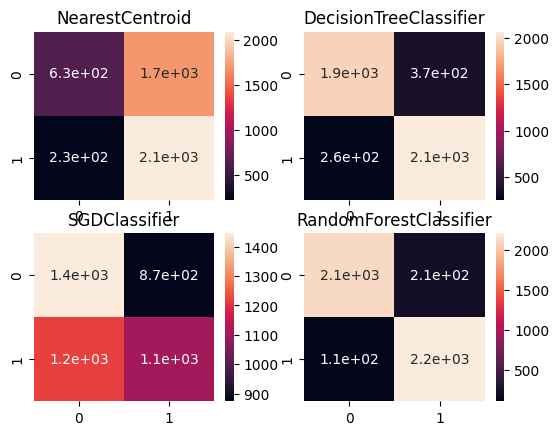

In [66]:
subplot(2,2,1)
title('NearestCentroid')
sns.heatmap(cm1,annot=True)
subplot(2,2,2)
title('DecisionTreeClassifier')
sns.heatmap(cm2,annot=True)
subplot(2,2,3)
title('SGDClassifier')
sns.heatmap(cm3,annot=True)
subplot(2,2,4)
title('RandomForestClassifier')
sns.heatmap(cm4,annot=True)

In [67]:
pcadf1=oversampled_df5.copy()
pcadf1.drop(columns='a predire',inplace=True)
df1_normalized=(pcadf1 - pcadf1.mean()) / pcadf1.std()
pca = PCA(n_components=pcadf1.shape[1])
pca.fit(df1_normalized)
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df1_normalized.columns))],
index=pcadf1.columns)
comp=pca.explained_variance_ratio_
cum_ex_var_r=[comp[:i].sum() for i in range(len(comp))]
reduc=pca.components_[:pexpdata(cum_ex_var_r,0.99)]
reddf1=oversampled_df5.copy()
apredire=reddf1['a predire']
reddf1.drop(columns='a predire',inplace=True)
reddf1=reddf1.dot(reduc.T)
reddf1['a predire']=apredire
X = reddf1.loc[:, reddf1.columns != "a predire"]
y = apredire
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=20)
clf=NearestCentroid()
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
l5=[]
acc=1-array([abs(list(y_test)[i]-pred[i]) for i in range(len(pred))]).sum()/len(pred)
l5+=[(acc,"NearestCentroid")]
cm1=confusion_matrix(y_test,pred)
param_grid_nearest_centroid = {'metric': ['euclidean', 'manhattan', 'cosine']}
grid_search_nearest_centroid = GridSearchCV(clf, param_grid_nearest_centroid, cv=5)
grid_search_nearest_centroid.fit(X_train, y_train)
print("Meilleurs paramètres pour NearestCentroid:", grid_search_nearest_centroid.best_params_)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
acc=1-array([abs(list(y_test)[i]-pred[i]) for i in range(len(pred))]).sum()/len(pred)
l5+=[(acc,"DecisionTreeClassifier")]
cm2=confusion_matrix(y_test,pred)
param_grid_decision_tree = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30]}
grid_search_decision_tree = GridSearchCV(clf, param_grid_decision_tree, cv=5)
grid_search_decision_tree.fit(X_train, y_train)
print("Meilleurs paramètres pour DecisionTreeClassifier:", grid_search_decision_tree.best_params_)
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
acc=1-array([abs(list(y_test)[i]-pred[i]) for i in range(len(pred))]).sum()/len(pred)
l5+=[(acc,"SGDClassifier")]
cm3=confusion_matrix(y_test,pred)
param_grid_sgd_classifier = {'loss': ['hinge', 'log', 'modified_huber'],
                              'alpha': [0.0001, 0.001, 0.01, 0.1]}
grid_search_sgd_classifier = GridSearchCV(clf, param_grid_sgd_classifier, cv=5)
grid_search_sgd_classifier.fit(X_train, y_train)
print("Meilleurs paramètres pour SGDClassifier:", grid_search_sgd_classifier.best_params_)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
acc=1-array([abs(list(y_test)[i]-pred[i]) for i in range(len(pred))]).sum()/len(pred)
l5+=[(acc,"RandomForestClassifier")]
cm4=confusion_matrix(y_test,pred)
print(sorted(l5,reverse=True))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_nearest_centroid.py:179: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_nearest_centroid.py:179: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_nearest_centroid.py:179: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_nearest_centroid.py:179: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_nearest_centroid.py:179: UserWarning: Averaging for metri

Meilleurs paramètres pour NearestCentroid: {'metric': 'manhattan'}
Meilleurs paramètres pour DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': 30}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Meilleurs paramètres pour SGDClassifier: {'alpha': 0.1, 'loss': 'log'}
[(0.9218181818181819, 'RandomForestClassifier'), (0.8527272727272728, 'DecisionTreeClassifier'), (0.5265454545454545, 'SGDClassifier'), (0.5265454545454545, 'NearestCentroid')]


<Axes: title={'center': 'svm'}>

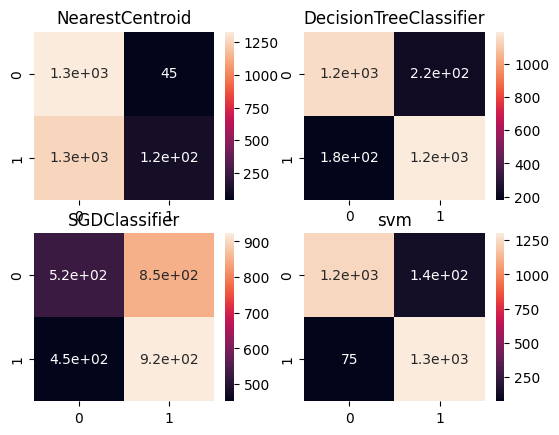

In [68]:
subplot(2,2,1)
title('NearestCentroid')
sns.heatmap(cm1,annot=True)
subplot(2,2,2)
title('DecisionTreeClassifier')
sns.heatmap(cm2,annot=True)
subplot(2,2,3)
title('SGDClassifier')
sns.heatmap(cm3,annot=True)
subplot(2,2,4)
title('svm')
sns.heatmap(cm4,annot=True)

In [69]:
def final_model(company):
  pcadf1=oversampled_df1.copy()
  pcadf1.drop(columns='a predire',inplace=True)
  pcadf1.dropna(axis=0,inplace=True)
  df1_normalized=(pcadf1 - pcadf1.mean()) / pcadf1.std()
  pca = PCA(n_components=pcadf1.shape[1])
  pca.fit(df1_normalized)
  comp=pca.explained_variance_ratio_
  cum_ex_var_r=[comp[:i].sum() for i in range(len(comp))]
  reduc=pca.components_[:pexpdata(cum_ex_var_r,0.99)]
  reddf1=oversampled_df1.copy()
  reddf1.dropna(axis=0,inplace=True)
  apredire=reddf1['a predire']
  reddf1.drop(columns='a predire',inplace=True)
  reddf1=reddf1.dot(reduc.T)
  reddf1['a predire']=apredire
  X = reddf1.loc[:, reddf1.columns != "a predire"]
  y = apredire
  clf = RandomForestClassifier()
  clf.fit(X, y)
  pred1=clf.predict_proba(company.dot(reduc.T))
  pcadf1=oversampled_df2.copy()
  pcadf1.drop(columns='a predire',inplace=True)
  pcadf1.dropna(axis=0,inplace=True)
  df1_normalized=(pcadf1 - pcadf1.mean()) / pcadf1.std()
  pca = PCA(n_components=pcadf1.shape[1])
  pca.fit(df1_normalized)
  comp=pca.explained_variance_ratio_
  cum_ex_var_r=[comp[:i].sum() for i in range(len(comp))]
  reduc=pca.components_[:pexpdata(cum_ex_var_r,0.99)]
  reddf1=oversampled_df2.copy()
  apredire=reddf1['a predire']
  reddf1.drop(columns='a predire',inplace=True)
  reddf1=reddf1.dot(reduc.T)
  reddf1['a predire']=apredire
  X = reddf1.loc[:, reddf1.columns != "a predire"]
  y = apredire
  clf = RandomForestClassifier()
  clf.fit(X, y)
  pred2=clf.predict_proba(company.dot(reduc.T))
  pcadf1=oversampled_df3.copy()
  pcadf1.drop(columns='a predire',inplace=True)
  df1_normalized=(pcadf1 - pcadf1.mean()) / pcadf1.std()
  pca = PCA(n_components=pcadf1.shape[1])
  pca.fit(df1_normalized)
  comp=pca.explained_variance_ratio_
  cum_ex_var_r=[comp[:i].sum() for i in range(len(comp))]
  reduc=pca.components_[:pexpdata(cum_ex_var_r,0.99)]
  reddf1=oversampled_df3.copy()
  apredire=reddf1['a predire']
  reddf1.drop(columns='a predire',inplace=True)
  reddf1=reddf1.dot(reduc.T)
  reddf1['a predire']=apredire
  X = reddf1.loc[:, reddf1.columns != "a predire"]
  y = apredire
  clf = RandomForestClassifier()
  clf.fit(X, y)
  pred3=clf.predict_proba(company.dot(reduc.T))
  pcadf1=oversampled_df4.copy()
  pcadf1.drop(columns='a predire',inplace=True)
  df1_normalized=(pcadf1 - pcadf1.mean()) / pcadf1.std()
  pca = PCA(n_components=pcadf1.shape[1])
  pca.fit(df1_normalized)
  comp=pca.explained_variance_ratio_
  cum_ex_var_r=[comp[:i].sum() for i in range(len(comp))]
  reduc=pca.components_[:pexpdata(cum_ex_var_r,0.99)]
  reddf1=oversampled_df4.copy()
  apredire=reddf1['a predire']
  reddf1.drop(columns='a predire',inplace=True)
  reddf1=reddf1.dot(reduc.T)
  reddf1['a predire']=apredire
  X = reddf1.loc[:, reddf1.columns != "a predire"]
  y = apredire
  clf = RandomForestClassifier()
  clf.fit(X, y)
  pred4=clf.predict_proba(company.dot(reduc.T))
  pcadf1=oversampled_df5.copy()
  pcadf1.drop(columns='a predire',inplace=True)
  df1_normalized=(pcadf1 - pcadf1.mean()) / pcadf1.std()
  pca = PCA(n_components=pcadf1.shape[1])
  pca.fit(df1_normalized)
  comp=pca.explained_variance_ratio_
  cum_ex_var_r=[comp[:i].sum() for i in range(len(comp))]
  reduc=pca.components_[:pexpdata(cum_ex_var_r,0.99)]
  reddf1=oversampled_df5.copy()
  apredire=reddf1['a predire']
  reddf1.drop(columns='a predire',inplace=True)
  reddf1=reddf1.dot(reduc.T)
  reddf1['a predire']=apredire
  X = reddf1.loc[:, reddf1.columns != "a predire"]
  y = apredire
  clf = RandomForestClassifier()
  clf.fit(X, y)
  pred5=clf.predict_proba(company.dot(reduc.T))
  return [pred5,pred4,pred3,pred2,pred1]

In [70]:
%%shell
jupyter nbconvert --to html /content/projectpythonalysis.ipynb

[NbConvertApp] WARNING | pattern '/content/projectpythonalysis4.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=T

CalledProcessError: ignored